In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import shapiro,kstest
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

## Problem Statement

In [2]:
#To predict selling price of car based on following Fcators

Factors = {"Columns":['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']}

## Data Gathering

In [3]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [8]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [9]:
df['Fuel_Type'].value_counts().to_dict()
df['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1, 'CNG': 2},inplace = True)

In [10]:
df['Seller_Type'].value_counts().to_dict()
df['Seller_Type'].replace({'Dealer': 0, 'Individual': 1},inplace = True)

In [11]:
df['Transmission'].value_counts().to_dict()
df['Transmission'].replace({'Manual': 0, 'Automatic': 1},inplace = True)

In [ ]:
{'Petrol': 0, 'Diesel': 1, 'CNG': 2}
{'Dealer': 0, 'Individual': 1}
{'Manual': 0, 'Automatic': 1}
Fuel_Type         object
Seller_Type       object
Transmission      object

In [12]:
df.drop('Car_Name',axis = 1,inplace = True)

## Outliers Detection

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


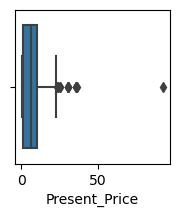

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


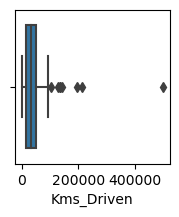

In [13]:
df1 = df[['Present_Price','Kms_Driven']]
for i in df1.columns :
    plt.figure(figsize = (2,2))
    sns.boxplot(df[i])
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


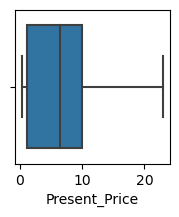

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


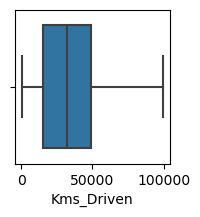

In [14]:
for i in df1.columns:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    
    lt = q1 - 1.5 * iqr
    ut = q3 + 1.5 * iqr
    df.loc[df[i]<lt , i] = lt
    df.loc[df[i]>ut , i] = ut
    plt.figure(figsize = (2,2))
    sns.boxplot(df[i])
    plt.show()

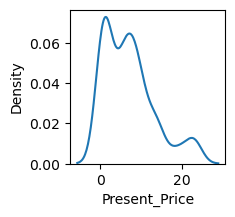

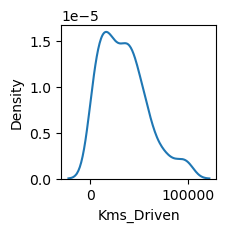

In [15]:
for i in df1.columns :
    plt.figure(figsize = (2,2))
    sns.kdeplot(df[i])
    plt.show()

## Assumptions

### 1. Linearity

In [16]:
df.corr()[1:2]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Selling_Price,0.236141,1.0,0.836624,0.110696,0.509467,-0.550724,0.367128,-0.088344


### 2. Independence

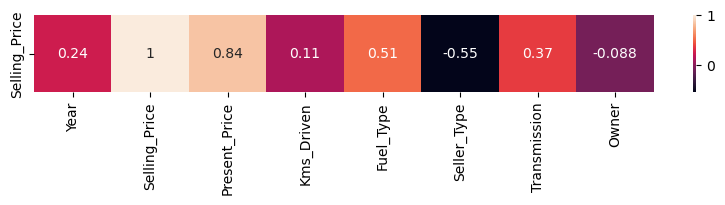

In [17]:

plt.figure(figsize = (10,1))
sns.heatmap(df.corr()[1:2],annot = True)
plt.show()

## 3. Multicollinearity

In [18]:
df2 = df.drop('Selling_Price',axis = 1)

In [19]:
for i in range(len(df2.columns)):
    vif = variance_inflation_factor(df2,i)
    print('*************************************',"\nvif")
    print(f"{df2.columns[i]} = {vif}")

************************************* 
vif
Year = 7.967781780867026
************************************* 
vif
Present_Price = 6.113897660416027
************************************* 
vif
Kms_Driven = 3.7617557046716756
************************************* 
vif
Fuel_Type = 1.6283871328694512
************************************* 
vif
Seller_Type = 3.0500792273417727
************************************* 
vif
Transmission = 1.449348426690738
************************************* 
vif
Owner = 1.0834874221343775


## Model Training

In [20]:
x = df.drop('Selling_Price',axis = 1)
y = df['Selling_Price']

In [21]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state = 5,test_size = 0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210, 7), (91, 7), (210,), (91,))

In [22]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [23]:
model.score(x_test,y_test)

0.7843629154855705

In [24]:
model.score(x_train,y_train)

0.7991297155819267

In [25]:
y_pred = model.predict(x_test)

In [26]:
residual = y_test - y_pred

### Normality

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

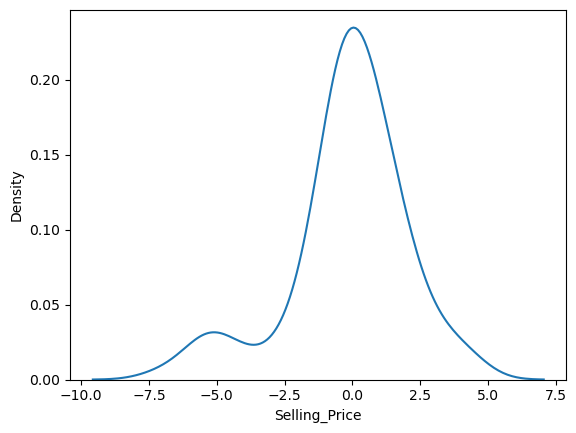

In [27]:
sns.kdeplot(residual)

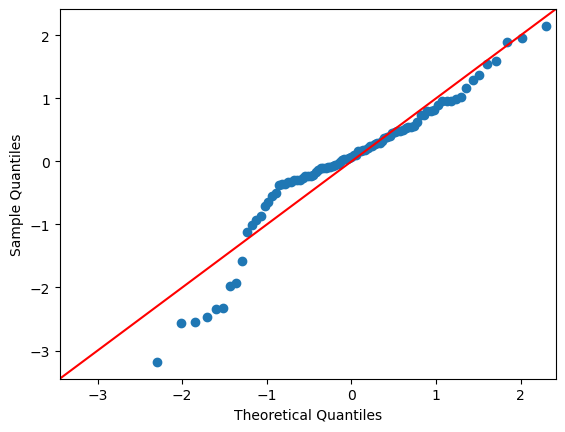

In [28]:
sm.qqplot(residual,stats.norm,fit = True,line = '45')
plt.show()

In [29]:
stats,p_value = shapiro(residual)
if p_value > 0.05 :
    print(f"p_value = {p_value}")
    print(f"Residuals are normally distributed")
else:
    print(f"p_value = {p_value}")
    print(f"Residuals are not normally distributed")

p_value = 5.031864202464931e-05
Residuals are not normally distributed


In [30]:
stats,p_value = kstest(residual,'norm')
if p_value > 0.05 :
    print(f"p_value = {p_value}")
    print(f"Residuals are normally distributed")
else:
    print(f"p_value = {p_value}")
    print(f"Residuals are not normally distributed")

p_value = 0.08642650869605972
Residuals are normally distributed


### Homoschedasticity

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price', ylabel='Selling_Price'>

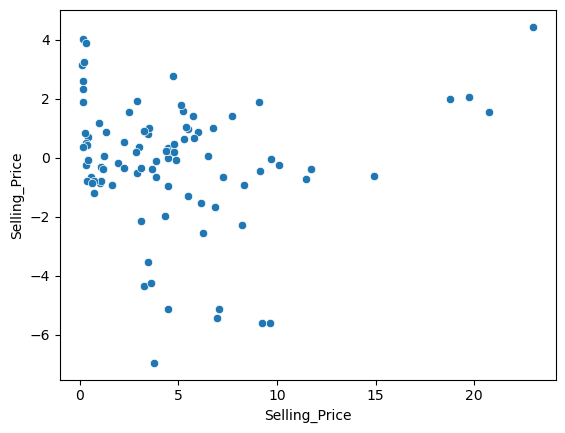

In [31]:
sns.scatterplot(y_test,residual)

## Model Evaluation

In [32]:
def model_eval(x,y,model):
    y_pred = model.predict(x)
    mse = mean_squared_error(y,y_pred)
    print(f"Mse = {mse}")
    
    mae = mean_absolute_error(y,y_pred)
    mae = mean_absolute_error(y,y_pred)
    
    rmse = np.sqrt(mse)
    print(f"rmse = {rmse}")
    
    r2 = r2_score(y,y_pred)
    print(f"r2_ score = {r2}")
    
    adj_r2 = (((1-r2)*(x.shape[0] - 1))/(x.shape[0] - x.shape[1] -1))
    print(f"Adj_r2 = {adj_r2}")
    return

In [33]:
model_eval(x_test,y_test,model)

Mse = 4.595633755044677
rmse = 2.143742931194101
r2_ score = 0.7843629154855705
Adj_r2 = 0.23382334465420068


In [34]:
model_eval(x_train,y_train,model)

Mse = 5.556695397558676
rmse = 2.35726438855693
r2_ score = 0.7991297155819267
Adj_r2 = 0.20783113585830357


## KNN Regressor

## Scaling

##### Data is not normal so we use normalization

In [79]:
x.drop('Year',axis = 1,inplace = True)

KeyError: "['Year'] not found in axis"

In [80]:
normal_scaler = MinMaxScaler()
normal_scaler.fit(x)
arr = normal_scaler.transform(x)
x_norm = pd.DataFrame(arr,columns = x.columns)

### Model Training

In [81]:
x_norm

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0.232877,0.267900,0.0,0.0,0.0,0.0
1,0.407424,0.429651,0.5,0.0,0.0,0.0
2,0.421122,0.064700,0.0,0.0,0.0,0.0
3,0.169244,0.047514,0.0,0.0,0.0,0.0
4,0.289439,0.424091,0.5,0.0,0.0,0.0
...,...,...,...,...,...,...
296,0.498453,0.338545,0.5,0.0,0.0,0.0
297,0.246575,0.601511,0.0,0.0,0.0,0.0
298,0.471940,0.883908,0.0,0.0,0.0,0.0
299,0.538224,0.085930,0.5,0.0,0.0,0.0


In [82]:
x_train,x_test,y_train,y_test = train_test_split(x_norm,y,random_state = 10,test_size = 0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210, 6), (91, 6), (210,), (91,))

In [83]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [84]:
y_pred = knn.predict(x_test)

In [85]:
model_eval(x_test,y_test,knn)

Mse = 2.789275736263737
rmse = 1.6701124920985824
r2_ score = 0.8888138310340981
Adj_r2 = 0.11912803817775208


In [86]:
model_eval(x_train,y_train,knn)

Mse = 3.6519735619047617
rmse = 1.911013752411207
r2_ score = 0.8596370384200355
Adj_r2 = 0.14451162054291916


## Hyperparameter Tunning

In [87]:
model1 = KNeighborsRegressor()
hype = {'n_neighbors':np.arange(3,25),'p':[1,2]}
rscv = RandomizedSearchCV(model1,hype)
rscv.fit(x_train,y_train)

RandomizedSearchCV(estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24]),
                                        'p': [1, 2]})

In [88]:
rscv.best_estimator_

KNeighborsRegressor(n_neighbors=3, p=1)

In [89]:
rscv.best_params_

{'p': 1, 'n_neighbors': 3}

## Model After Tunning

In [90]:
knn_model = KNeighborsRegressor(n_neighbors = 3, p = 2)
knn_model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [91]:
y_pred = knn_model.predict(x_test)

#### Testing Accuracy

In [92]:
model_eval(x_test,y_test,knn_model)

Mse = 2.7933236874236878
rmse = 1.671323932522863
r2_ score = 0.8886524715185132
Adj_r2 = 0.11930092337302153


##### Training Accuracy

In [93]:
model_eval(x_train,y_train,knn_model)

Mse = 2.47171126984127
rmse = 1.5721676977476895
r2_ score = 0.9050002120430073
Adj_r2 = 0.09780766346311072


### Finding Accuracy By Using k_value and accuracy plot

In [94]:
k = np.arange(3,25)
train1 = []
test1 = []
train2 = []
test2 = []
for i in k :
    ## For Manhatten distance
    knn1 = KNeighborsRegressor(n_neighbors = i, p = 1)
    knn1.fit(x_train,y_train)
    tr_acc1 = knn1.score(x_train,y_train)
    te_acc1 = knn1.score(x_test,y_test)
    train1.append(tr_acc1)
    test1.append(te_acc1)
    
    ## For Euclidean Distance
    knn2 = KNeighborsRegressor(n_neighbors = i, p = 2)
    knn2.fit(x_train,y_train)
    tr_acc2 = knn2.score(x_train,y_train)
    te_acc2= knn2.score(x_test,y_test)
    train2.append(tr_acc2)
    test2.append(te_acc2)
    
    
print(f"For Manhatten Distance")
print(f"Training Accuracy = \n{train1}")
print('*'*100)
print(f"Testing Accuracy = \n{test1}")
print('*'*100)
print(f"For Euclidean Distance")
print(f"Training Accuracy = \n{train2}")
print('*'*100)
print(f"Testing Accuracy = \n{test2}")

For Manhatten Distance
Training Accuracy = 
[0.9025914263719901, 0.8772373140449619, 0.8548829032468307, 0.8329668812525457, 0.8259796026138085, 0.8118508584940456, 0.7903669117794573, 0.7782873820353595, 0.7672682858150094, 0.746758545707122, 0.7376485976431322, 0.7214737802783997, 0.7158365858262175, 0.7028530159105288, 0.6881292256649192, 0.6779561863953137, 0.6727614817484405, 0.6629599145012718, 0.657691186604694, 0.6453149347784148, 0.6395429841841301, 0.6433058146185927]
****************************************************************************************************
Testing Accuracy = 
[0.8829154505570455, 0.8849270888032296, 0.8869052321950565, 0.8704451038916798, 0.8643002202325551, 0.8437073186783969, 0.8229787259682495, 0.8065740059178209, 0.7956460840701921, 0.7770120496560579, 0.7585176949728938, 0.7438132179393343, 0.7318353388844834, 0.7243007534850834, 0.7046691277234325, 0.692004370373297, 0.6766038321252315, 0.6668745998779206, 0.6621640870516743, 0.64858923261116

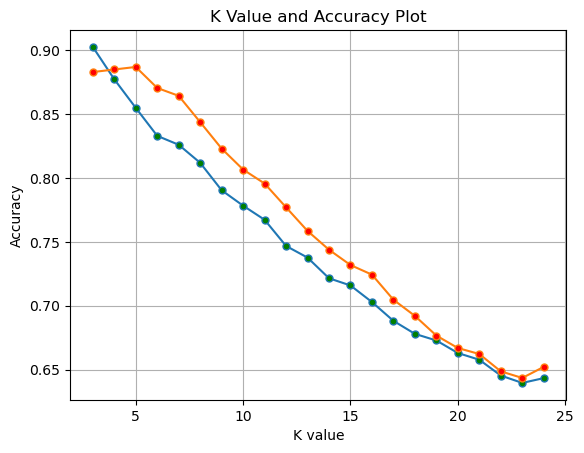

In [95]:
plt.plot(k,train1,marker = 'o',markersize = 5,markerfacecolor = 'green')
plt.plot(k,test1,marker = 'o',markersize = 5,markerfacecolor = 'red')
plt.title("K Value and Accuracy Plot")
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

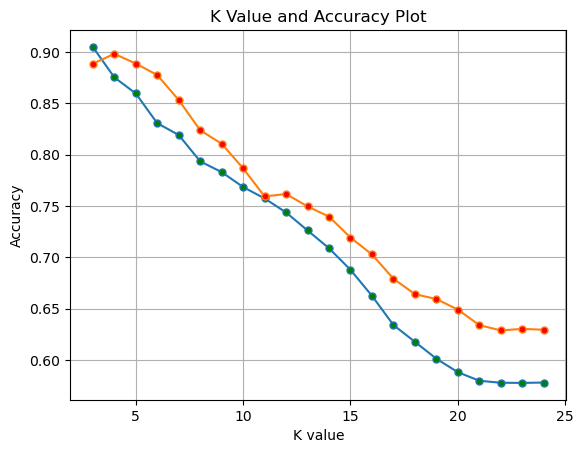

In [96]:
plt.plot(k,train2,marker = 'o',markersize = 5,markerfacecolor = 'green')
plt.plot(k,test2,marker = 'o',markersize = 5,markerfacecolor = 'red')
plt.title("K Value and Accuracy Plot")
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

So model after tunning i.e k = 3 and p = 2 and knn_model is our generalized model so we can create pickle file of knn_model.

## User Defined Function

In [97]:
import pickle
import json

In [98]:
with open('car_model.pkl','wb') as file :
    pickle.dump(knn_model,file)

In [99]:
x_norm.columns

Index(['Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner'],
      dtype='object')

In [100]:
project_data = {'columns':['Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner'],
        'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2},
        "Seller_Type": {'Dealer': 0, 'Individual': 1},
        'Transmission': {'Manual': 0, 'Automatic': 1}
        }

In [101]:
with open('project_data.json','w') as file:
    json.dump(project_data,file)

In [103]:
with open('project_data.json','r') as file :
    project_data = json.load(file)

In [104]:
with open('car_model.pkl','rb') as file :
    model = pickle.load(file)

In [105]:
with open('car_scaler.pkl','wb') as file :
    pickle.dump(normal_scaler,file)

In [106]:
with open('car_scaler.pkl','rb') as file :
    scaler = pickle.load(file)

In [111]:
user_data = np.zeros(len(project_data['columns']))

Present_Price = 5.59
Kms_Driven = 27000.0
Fuel_Type = 'Petrol'
Seller_Type = 'Dealer'
Transmission = 'Manual'
Owner = 0

user_data[0] = Present_Price
user_data[1] = Kms_Driven
user_data[2] = project_data['Fuel_Type'][Fuel_Type]
user_data[3] = project_data['Seller_Type'][Seller_Type]
user_data[4] = project_data['Transmission'][Transmission]
user_data[5] = Owner

scaled_data = scaler.transform([user_data])
prediction = model.predict(scaled_data)[0]
print(f"Prediction = {prediction}")

Prediction = 3.8333333333333335


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [59]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000.0,0,0,0,0
1,2013,4.75,9.54,43000.0,1,0,0,0
2,2017,7.25,9.85,6900.0,0,0,0,0
3,2011,2.85,4.15,5200.0,0,0,0,0
4,2014,4.60,6.87,42450.0,1,0,0,0
